Stock Code:AAPL
From (yyyy-mm-dd):2021-05-01
to (yyyy-mm-dd):2021-08-21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

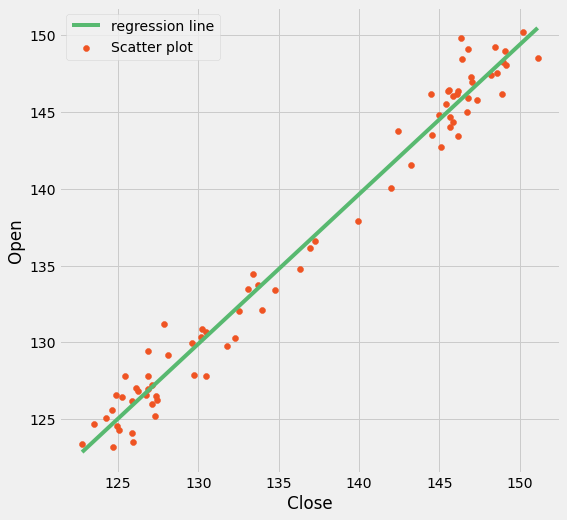

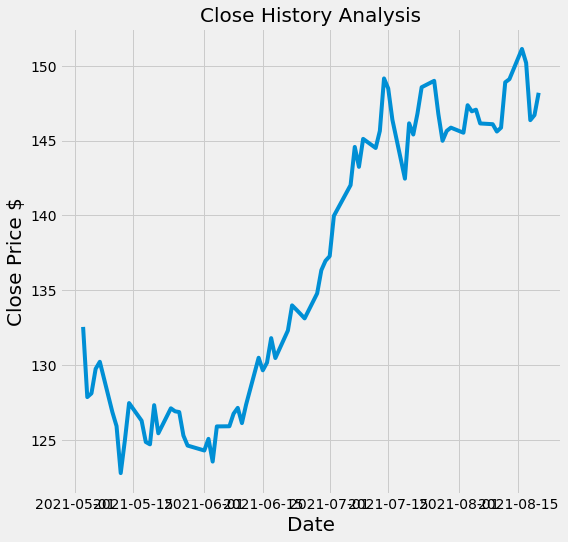

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [6]:
#Stock_Predictionmodel based on OPEN Price
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from google.colab import files

#Get Stocck data
Stock_name = input("Stock Code:")
Caps = Stock_name.upper()
stdate = input("From (yyyy-mm-dd):")
endate = input("to (yyyy-mm-dd):")
df = web.DataReader(Caps, data_source='yahoo', start= stdate, end= endate)

#Collecting the Data
X = df['Close'].values
Y = df['Open'].values
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)
numer = 0
denom = 0
for i in range(m):
  numer += (X[i]-mean_x) * (Y[i]-mean_y)
  denom += (X[i]-mean_x) ** 2
b1 = numer/denom   #m
b0 = mean_y - (b1 * mean_x) #finding out C
df['MeanX'] = mean_x
df['Meany'] = mean_y
df['M'] = b1
df['C'] = b0

#Plotting Values and Regression Line
max_x = np.max(X)
min_x = np.min(X)
x = np.linspace(min_x, max_x, len(df['Close']))
y = b0 + b1 * x
df['LineSpace(X)'] = list(x)
df['Pred_Close'] = list(y)

#Acccuriccy Test
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]   #Y = C + mx
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 =  1 - (ss_r/ss_t)
df['Model_Accuricy'] = r2
df.to_excel(Caps +'.xlsx',sheet_name = 'data')
files.download(Caps +'.xlsx')

#Line Vals
plt.figure(figsize=(8,8))
plt.plot(x, y, color = '#58b970' , label = 'regression line')
plt.scatter(X, Y, c = '#ef5423', label = "Scatter plot")
plt.xlabel('Close')
plt.ylabel('Open')
plt.legend()
plt.show()



#GetStats
plt.figure(figsize=(8,8))
plt.title('Close History Analysis',fontsize = 20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Close Price $',fontsize = 20)
plt.show()
plt.savefig(Caps +'.png')
files.download(Caps +'.png')